In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")  

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [11]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.9853658536585366


In [13]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=df.drop("target", axis=1).columns,
                           class_names=["No Disease", "Disease"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree") 

'decision_tree.pdf'

In [14]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
print("Pruned Tree Accuracy:", accuracy_score(y_test, dt_pruned.predict(X_test)))


Pruned Tree Accuracy: 0.8


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Accuracy: 0.9853658536585366


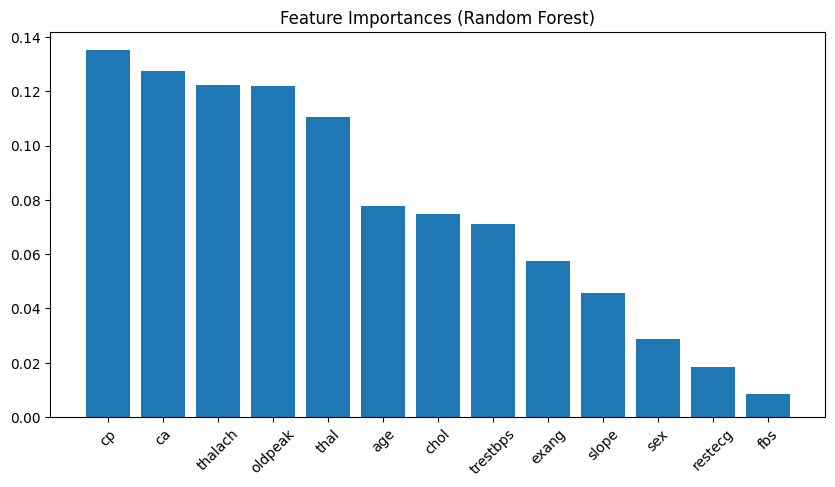

In [16]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop("target", axis=1).columns

plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Score: 0.9970731707317073
